<a href="https://colab.research.google.com/github/NgoThanhNha/Artificial_Intelligence/blob/main/__Rev2_0_Cuoi_ky_AI_Dectech_Medicine_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Load link folder of Databases
folder = '/content/drive/MyDrive/__AI_Cuoi_ky_Medicine_Images/__Medicine_Images_Train/'
photos, labels = list(), list()

In [ ]:
for file in listdir(folder):
  output = 0.0
  if 'Normal' in file:
    output = 1.0
  if 'virus' in file:
    output = 2.0
  if 'bacteria' in file:
    output = 3.0
  photo = load_img(folder+file, target_size = (200,200), color_mode='grayscale')
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

In [ ]:
# Save data after preprocessing data
save('/content/drive/MyDrive/Picture_Preprocessing/Medicine_Images/Medicine_Images_RGB_photos.npy', photos)
save('/content/drive/MyDrive/Picture_Preprocessing/Medicine_Images/Medicine_Images_RGB_labels.npy', labels)

In [2]:
# Read data
photos = np.load('/content/drive/MyDrive/Picture_Preprocessing/Medicine_Images/Medicine_Images_RGB_photos.npy')
labels = np.load('/content/drive/MyDrive/Picture_Preprocessing/Medicine_Images/Medicine_Images_RGB_labels.npy')

In [3]:
# Chuẩn hóa dữ liệu
x = photos.astype('float32')/255
y = labels
y = to_categorical(y, num_classes=4)
print(x.shape, y.shape)

(3805, 200, 200, 3) (3805, 4)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
# Import library training model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [6]:
# Config model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(200, 200, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(4, activation='softmax'))

In [7]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 300, epochs = 10, verbose = 1)

Epoch 1/10
11/11 [==============================] - 22s 473ms/step - loss: 2.1639 - accuracy: 0.4284
Epoch 2/10
11/11 [==============================] - 4s 375ms/step - loss: 0.7435 - accuracy: 0.7185
Epoch 3/10
11/11 [==============================] - 4s 377ms/step - loss: 0.5661 - accuracy: 0.7884
Epoch 4/10
11/11 [==============================] - 4s 370ms/step - loss: 0.4517 - accuracy: 0.8407
Epoch 5/10
11/11 [==============================] - 4s 379ms/step - loss: 0.3649 - accuracy: 0.8627
Epoch 6/10
11/11 [==============================] - 4s 378ms/step - loss: 0.3275 - accuracy: 0.8807
Epoch 7/10
11/11 [==============================] - 4s 375ms/step - loss: 0.3094 - accuracy: 0.8840
Epoch 8/10
11/11 [==============================] - 4s 373ms/step - loss: 0.2672 - accuracy: 0.9014
Epoch 9/10
11/11 [==============================] - 4s 395ms/step - loss: 0.2626 - accuracy: 0.9001
Epoch 10/10
11/11 [==============================] - 4s 371ms/step - loss: 0.2354 - accuracy: 0.909

In [8]:
# Đánh giá chất lượng mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

24/24 [==============================] - 2s 38ms/step - loss: 0.2882 - accuracy: 0.9041
Loss: 0.28817251324653625
Accuracy: 0.9040735960006714


In [10]:
model.save('/content/drive/MyDrive/Model_Trained/Medicine_Images_RGB_Rev1.0.h5')

In [16]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Model_Trained/Medicine_Images_RGB_Rev1.0.h5')

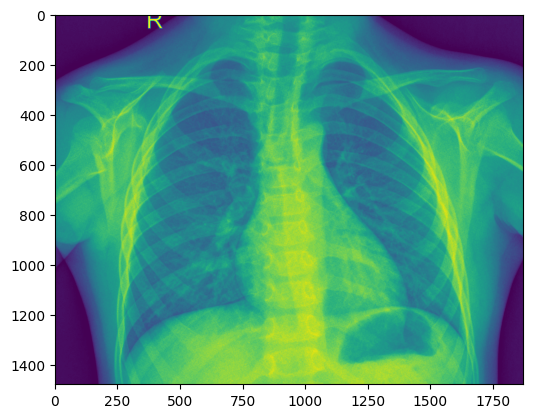

1/1 [==============================] - 0s 27ms/step
1
Bình thường


In [22]:
# Mở ảnh
img = Image.open('Normal (1).jpeg')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((200, 200))
img = img.convert("RGB")

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32') / 255.0
plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", "Bình thường","Viêm phổi do Virus","Viêm phổi do Bacteria"]
temp1 = matrix[0]
print(temp1)
print(class_names[temp1])

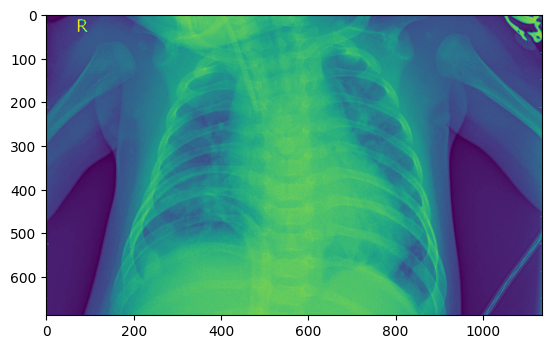

1/1 [==============================] - 0s 29ms/step
3
Viêm phổi do Bacteria


In [23]:
# Mở ảnh
img = Image.open('person1089_bacteria_3029.jpeg')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((200, 200))
img = img.convert("RGB")

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32') / 255.0
plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", "Bình thường","Viêm phổi do Virus","Viêm phổi do Bacteria"]
temp1 = matrix[0]
print(temp1)
print(class_names[temp1])

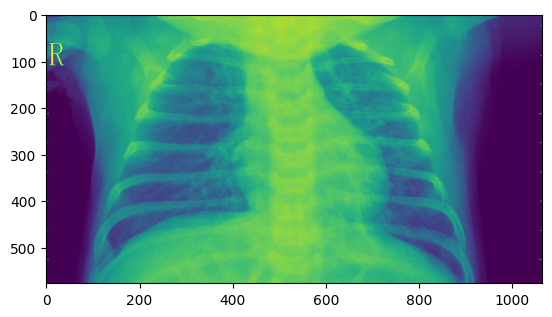

1/1 [==============================] - 0s 35ms/step
2
Viêm phổi do Virus


In [24]:
# Mở ảnh
img = Image.open('person1089_virus_1808.jpeg')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((200, 200))
img = img.convert("RGB")

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32') / 255.0
plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", "Bình thường","Viêm phổi do Virus","Viêm phổi do Bacteria"]
temp1 = matrix[0]
print(temp1)
print(class_names[temp1])